In [1]:
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.optimizers import rmsprop
import numpy as np
import numpy.random as nr
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images[4].shape)

11493376/11490434 [==============================] - 2s 0us/step
(28, 28)


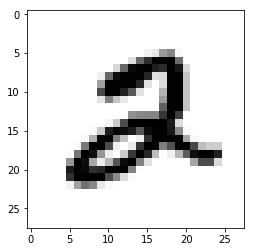

Label = 2


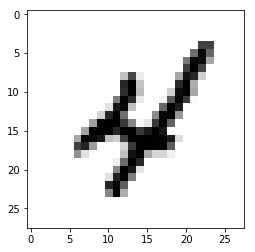

Label = 4


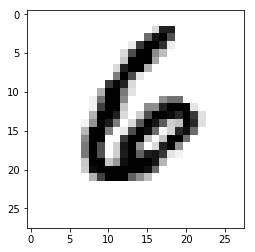

Label = 6


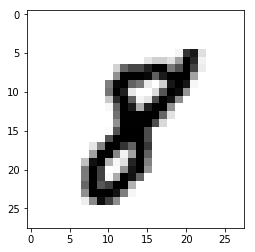

Label = 8


In [3]:
for i in range(5, 20, 4):
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.show()
    print('Label = ' + str(train_labels[i]))

In [4]:
print(train_images.shape, train_labels.shape)
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28) (60000,)
(60000, 784)
float32


In [6]:
print(test_images.shape, test_labels.shape)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
print(test_images.shape)

(10000, 784) (10000,)
(10000, 784)


In [7]:
print(train_labels[5:,])

[2 1 3 ... 5 6 8]


In [8]:
train_labels = ku.to_categorical(train_labels)
print(train_labels[5:,])

[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
test_labels = ku.to_categorical(test_labels)

In [10]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
nn.add(layers.Dense(10, activation = 'softmax'))

In [11]:
nn.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
nr.seed(9898)
set_random_seed(9777)
nn.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 18s 306us/step - loss: 0.2553 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 16s 268us/step - loss: 0.1042 - acc: 0.9686
Epoch 3/5
60000/60000 [==============================] - 18s 297us/step - loss: 0.0698 - acc: 0.97911s - l
Epoch 4/5
60000/60000 [==============================] - 17s 286us/step - loss: 0.0510 - acc: 0.98440s - loss: 0.0
Epoch 5/5
60000/60000 [==============================] - 17s 283us/step - loss: 0.0381 - acc: 0.9884
